In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
zip(*coordinates)

In [4]:
coordinates

[(20.16178091680473, 150.66220503647003),
 (-84.49138535619306, 76.28593275393627),
 (-18.23907491963368, -85.77322126931739),
 (31.436519966173947, 126.26531500059201),
 (-66.44711620648667, 141.08756494875814),
 (74.52355979632966, 59.76158807630216),
 (69.78670912469997, 134.22047399629656),
 (60.95289835500532, -22.083026026538818),
 (-40.94530202081151, -93.79358563489684),
 (-37.11395697429182, 91.1392358707248),
 (-57.43954025615401, 83.19637623068257),
 (-10.094766486632366, -14.35483215797629),
 (-46.72772266975176, -122.61392818833988),
 (-66.95143438024431, 65.23752090662092),
 (77.14469298214414, -39.100839826931264),
 (-81.24515858959109, 39.62019826530354),
 (-81.68053011076445, -152.34659980701278),
 (-78.75120800371926, 42.34394118718646),
 (53.578249654005674, 62.59233817129092),
 (61.59081657833826, 95.43670628475422),
 (61.22218638032081, 69.12294865722146),
 (-75.88654261222402, 85.94399102803175),
 (-2.524488084894614, 173.21758029167808),
 (55.78584804220006, -157

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime
import time  # THis was not in the modules but time.sleep didnt work without it

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(30)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
   # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print(f"{city} not found. Skipping...")
        continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | fukue
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | amderma
amderma not found. Skipping...
Processing Record 7 of Set 1 | ust-kuyga
Processing Record 8 of Set 1 | grindavik
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | taolanaro
taolanaro not found. Skipping...
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | komsomolets
Processing Record 17 of Set 1 | baykit
Processing Record 18 of Set 1 | gornopravdinsk
Processing Record 19 of Set 1 | utiroa
utiroa not found. Skipping...
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | esper

Processing Record 34 of Set 4 | plouzane
Processing Record 35 of Set 4 | nanortalik
Processing Record 36 of Set 4 | salalah
Processing Record 37 of Set 4 | clyde river
Processing Record 38 of Set 4 | san pedro
Processing Record 39 of Set 4 | san carlos de bariloche
Processing Record 40 of Set 4 | sur
Processing Record 41 of Set 4 | pilar
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | lakselv
Processing Record 44 of Set 4 | camacupa
Processing Record 45 of Set 4 | chapais
Processing Record 46 of Set 4 | mindelo
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | erzin
Processing Record 49 of Set 4 | gorontalo
Processing Record 50 of Set 4 | los llanos de aridane
Processing Record 1 of Set 5 | winnemucca
Processing Record 2 of Set 5 | kieta
Processing Record 3 of Set 5 | stepnyak
Processing Record 4 of Set 5 | tawkar
tawkar not found. Skipping...
Processing Record 5 of Set 5 | rumonge
Processing Record 6 of Set 5 | kotelnich
Processing Rec

Processing Record 23 of Set 8 | mbala
Processing Record 24 of Set 8 | husavik
Processing Record 25 of Set 8 | sokoni
Processing Record 26 of Set 8 | lubyany
Processing Record 27 of Set 8 | samalaeulu
samalaeulu not found. Skipping...
Processing Record 28 of Set 8 | saleaula
saleaula not found. Skipping...
Processing Record 29 of Set 8 | kiama
Processing Record 30 of Set 8 | baiyin
Processing Record 31 of Set 8 | seymchan
Processing Record 32 of Set 8 | pareora
Processing Record 33 of Set 8 | grande prairie
Processing Record 34 of Set 8 | vanino
Processing Record 35 of Set 8 | kazalinsk
kazalinsk not found. Skipping...
Processing Record 36 of Set 8 | jutai
Processing Record 37 of Set 8 | yuzhno-yeniseyskiy
yuzhno-yeniseyskiy not found. Skipping...
Processing Record 38 of Set 8 | ilulissat
Processing Record 39 of Set 8 | zlobin
Processing Record 40 of Set 8 | tual
Processing Record 41 of Set 8 | bolshoye nagatkino
Processing Record 42 of Set 8 | dakar
Processing Record 43 of Set 8 | vilh

Processing Record 7 of Set 12 | san martin
Processing Record 8 of Set 12 | jalu
Processing Record 9 of Set 12 | lolua
lolua not found. Skipping...
Processing Record 10 of Set 12 | itarema
Processing Record 11 of Set 12 | north bend
Processing Record 12 of Set 12 | porto velho
Processing Record 13 of Set 12 | kilindoni
Processing Record 14 of Set 12 | hay river
Processing Record 15 of Set 12 | beringovskiy
Processing Record 16 of Set 12 | russell
Processing Record 17 of Set 12 | kulhudhuffushi
Processing Record 18 of Set 12 | ozgon
ozgon not found. Skipping...
Processing Record 19 of Set 12 | clarksburg
Processing Record 20 of Set 12 | dire dawa
Processing Record 21 of Set 12 | berlevag
Processing Record 22 of Set 12 | plettenberg bay
Processing Record 23 of Set 12 | umm jarr
umm jarr not found. Skipping...
Processing Record 24 of Set 12 | punta gorda
Processing Record 25 of Set 12 | sumbawanga
Processing Record 26 of Set 12 | venice
Processing Record 27 of Set 12 | ust-ishim
Processing

In [10]:
#Tall number of cities
print(len(city_data))

535


In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,55.72,54,0,6.87,JP,2022-03-11 22:32:35
1,Busselton,-33.6500,115.3333,67.48,80,15,6.73,AU,2022-03-11 22:25:20
2,Pisco,-13.7000,-76.2167,75.25,73,0,11.50,PE,2022-03-11 22:28:59
3,Fukue,32.6881,128.8419,61.59,76,76,5.97,JP,2022-03-11 22:32:36
4,Hobart,-42.8794,147.3294,62.26,70,20,9.22,AU,2022-03-11 22:27:15
5,Ust-Kuyga,70.0167,135.6000,-5.75,99,100,2.21,RU,2022-03-11 22:32:36
6,Grindavik,63.8424,-22.4338,39.15,81,75,14.97,IS,2022-03-11 22:32:37
7,Ancud,-41.8697,-73.8203,58.91,82,2,3.06,CL,2022-03-11 22:32:37
8,Georgetown,5.4112,100.3354,80.53,93,20,1.14,MY,2022-03-11 22:25:27
9,Rikitea,-23.1203,-134.9692,78.13,70,3,1.48,PF,2022-03-11 22:30:58


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [19]:
city_data_df = city_data_df[new_column_order]

In [20]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2022-03-11 22:32:35,35.1333,140.3000,55.72,54,0,6.87
1,Busselton,AU,2022-03-11 22:25:20,-33.6500,115.3333,67.48,80,15,6.73
2,Pisco,PE,2022-03-11 22:28:59,-13.7000,-76.2167,75.25,73,0,11.50
3,Fukue,JP,2022-03-11 22:32:36,32.6881,128.8419,61.59,76,76,5.97
4,Hobart,AU,2022-03-11 22:27:15,-42.8794,147.3294,62.26,70,20,9.22
5,Ust-Kuyga,RU,2022-03-11 22:32:36,70.0167,135.6000,-5.75,99,100,2.21
6,Grindavik,IS,2022-03-11 22:32:37,63.8424,-22.4338,39.15,81,75,14.97
7,Ancud,CL,2022-03-11 22:32:37,-41.8697,-73.8203,58.91,82,2,3.06
8,Georgetown,MY,2022-03-11 22:25:27,5.4112,100.3354,80.53,93,20,1.14
9,Rikitea,PF,2022-03-11 22:30:58,-23.1203,-134.9692,78.13,70,3,1.48


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

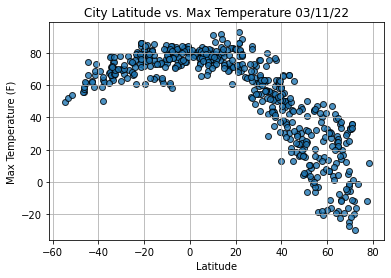

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

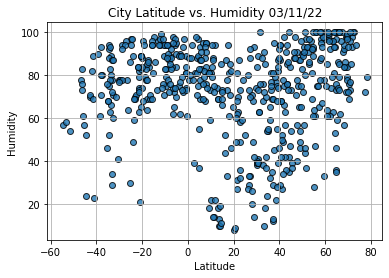

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

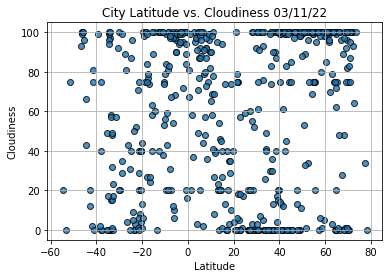

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

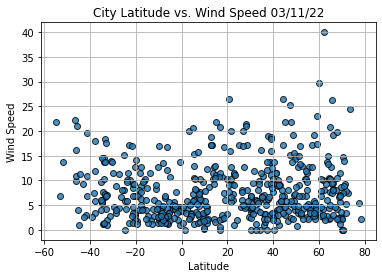

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()